# Task 6.6 - Sourcing & Analyzing Time Series Data

#### Directions

1. Install the Quandl library and register for a Quandl account as described in the Exercise.
2. Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.
3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
    - In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
    - Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.
4. Create a line chart of your data.
5. Decompose the data’s components.
    - Analyze the results from the plot in a markdown cell.
6. Conduct a Dickey-Fuller test to check for stationarity.
    - Interpret the results in a markdown cell and reference your null hypothesis.
7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.
9. Check your data’s autocorrelations.

#### Bonus Task
- The bonus task for this Exercise includes its own additional Bonus Exercise, where you’ll learn about and walk through your first forecast modeling (a continutation of the stationarizing you conducted in the main task!). Download the PDF for the Bonus Exercise here, which includes the additional Exercise content and task instructions.

## Task Step 1 - Install Quandl library

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

# Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.
warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

## Task Step 2 - Find & Import Data Set


In [2]:
# Configure API key
quandl.ApiConfig.api_key = 'erL9fuixsENqQF4BTohP'


In [3]:
#### Importing the Federal Reserve Economic Data "Zillow Real Estate Data", "All Homes" in "King County" variable.
#data = quandl.get('FRED/NROU')
data = quandl.get_table('ZILLOW/DATA')#,indicator_id='ZALL')#, region_id='99693')


## Task Step 3 - Subset of data

### Grouping Average Value by Date

- Group the average value of 'value' by the 'date' in the data frame.
- My previous dataset was about house sales in King County, WA between 2014-15.
- Assuming the present is at the end of 2015, the purpose of my project is to predict 2016 house sales by analyzing and comparing house sales in King County and the U.S.
- Therefore, I created a subset between 1996 and 2015 for this time series analysis.

In [4]:
# Group by column "date" with average values of column "value"
avg_by_date = data.groupby('date')['value'].mean()

# Convert result into a new data frame
avg_by_date = avg_by_date.reset_index()


In [5]:
avg_by_date


,date,value
0,1996-01-31,141962.000000
1,1996-02-29,142601.250000
2,1996-03-31,142902.500000
3,1996-04-30,143683.000000
4,1996-05-31,144764.750000
...,...,...
328,2023-05-31,436211.136062
329,2023-06-30,438639.936067
330,2023-07-31,440346.901173
331,2023-08-31,441355.320082


In [6]:
data_sub = avg_by_date.loc[(avg_by_date['date'] >= '1996-01-01') & (avg_by_date['date'] < '2015-06-01')]


In [7]:
data_sub.set_index('date', inplace=True)


In [8]:
data_sub

,value
date,
1996-01-31,141962.000000
1996-02-29,142601.250000
1996-03-31,142902.500000
1996-04-30,143683.000000
1996-05-31,144764.750000
...,...
2015-01-31,203091.809084
2015-02-28,204129.667512
2015-03-31,205279.694547


In [9]:
data_sub.shape

(233, 1)

In [10]:
data_sub.columns

Index(['value'], dtype='object')

In [11]:
# Create folder path
path = '/Users/peterkim/Document/sql/CareerFoundry/Immersion Prep/6. Advanced Analytics & Dashboard Design/House Sales in KC Analysis'


In [12]:
# Saving and exporting haus_sub.csv
data_sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'haus_sub.csv'))


## Task Step 4 - Create a linechart

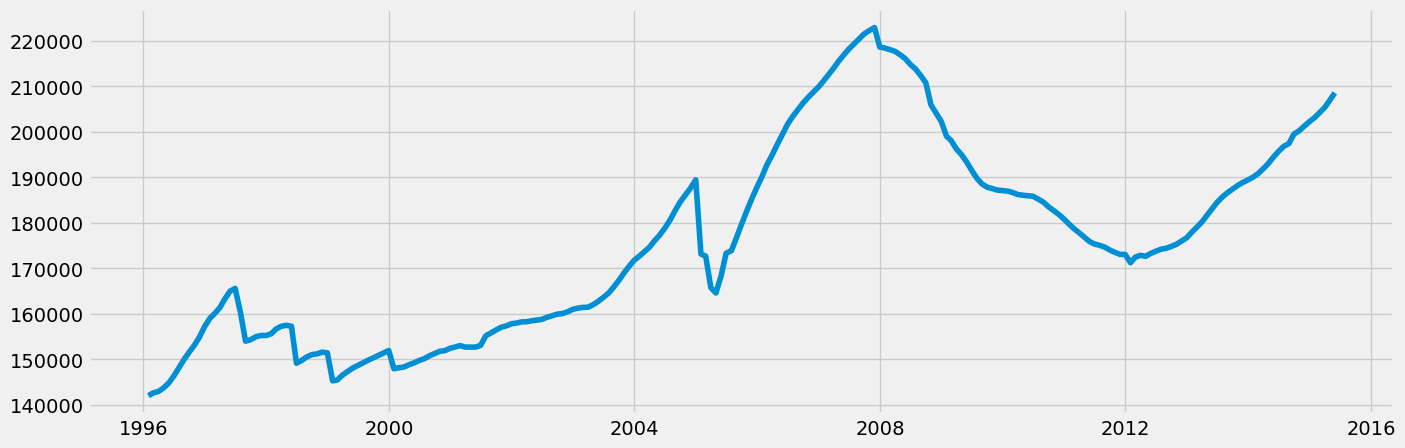

In [13]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data_sub)


## Task Step 5 - Decompose data components

In [14]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')


In [15]:
# Saving and exporting haus_sub.csv
#decomposition.to_csv(os.path.join(path, '02 Data','Prepared Data', 'decomposition.csv'))


from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have already performed seasonal decomposition and have a DecomposeResult object
result = seasonal_decompose(data_sub, model='additive')

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Create a DataFrame
decomposition_df = pd.DataFrame({
    'Date': data_sub.index,
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual
})

# Save to CSV
decomposition_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomposition.csv'), index=False)


In [16]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7


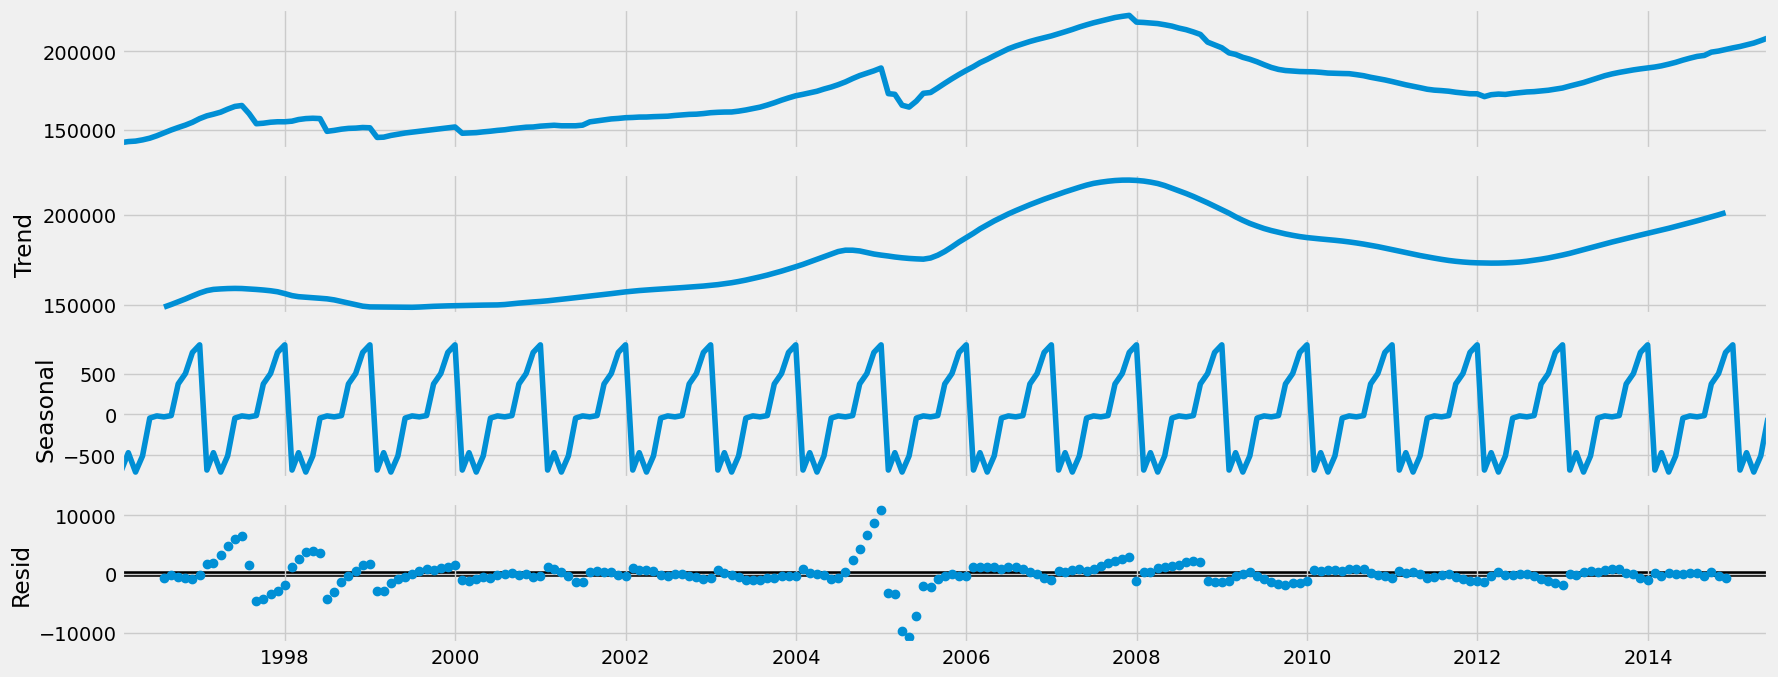

In [17]:
# Plot separate components
decomposition.plot()
plt.show()


#### Trends:
- The trend component represents the underlying, long-term movement in the data. In this case, the trend shows that house prices have been rising steadily since 1996.
- There's a noticeable peak in the trend in 2008. This peak is likely associated with the subprime mortgage crisis, which triggered a housing market crash and a subsequent decrease in house prices.
- After the 2008 crisis, the trend begins to rise again from 2012 onwards, indicating a recovery in house prices.
- The rising trend from 2012 to June 2015 suggests a period of robust house sales and increasing property values.

#### Seasonality:
- The seasonality component represents recurring patterns that occur within each year. 
- House prices rise roughly from spring to fall, likely due to factors like better weather and increased activity in the real estate market during these seasons.
- Prices tend to plunge in the winter months. This is a common trend in real estate, as fewer people buy homes during the colder months, leading to a decrease in demand.

#### Residual:
- The residual component reflects the unexplained variations or noise in the data. In this analysis, the residual values are described in relation to the rising seasonality in 2004.
- In 2004, during the house sales rising season, the residual reached over +10,000. This means that during that season, house prices were significantly higher than what the trend and seasonality components alone would predict.
- Shortly after the peak in 2004, the residual drops below -10,000 in early 2005. This suggests a sharp correction in house prices or a sudden drop in demand.
- From early 2006 onwards, the residual remains around zero. This could indicate a more stable housing market with fewer unexplained fluctuations.


## Task Step 6 - Dickey-Fuller test

In [18]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])


Dickey-Fuller Stationarity test:
Test Statistic                  -1.206771
p-value                          0.670676
Number of Lags Used              2.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


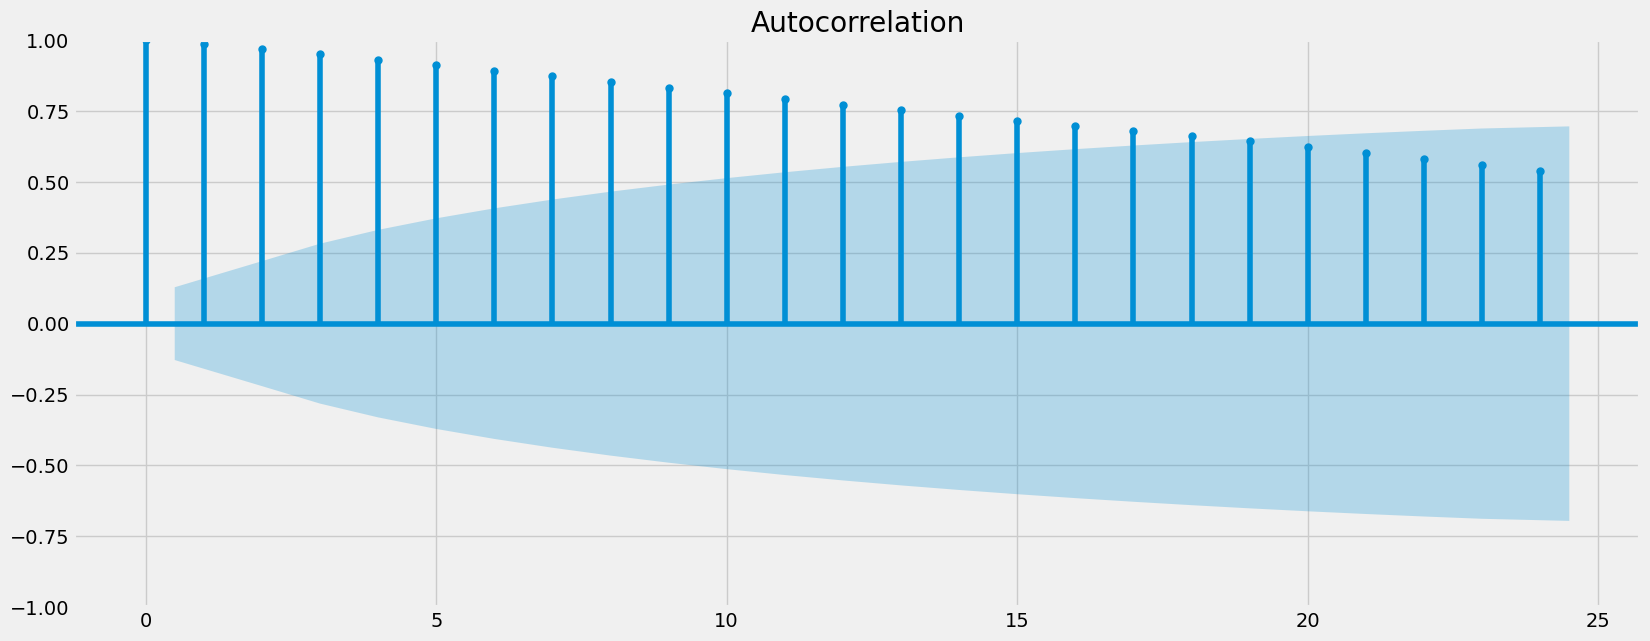

In [19]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_sub)
plt.show()


In [45]:
# Define the Dickey-Fuller test function
#def dickey_fuller(timeseries): 
#    print('Dickey-Fuller Stationarity test:')
#    test = adfuller(timeseries, autolag='AIC')
#    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
#    for key, value in test[4].items():
#        result['Critical Value (%s)' % key] = value
#    return result

# Apply the test using the function on the time series
#result_df = dickey_fuller(data_sub['value'])

# Plot autocorrelations
#plot_acf(data_sub)
#plt.show()

# Save the results to a CSV file
#result_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dickey_fuller_results.csv'), index=False)


In [48]:
# Save autocorrelation values to a CSV file
from statsmodels.tsa.stattools import adfuller, acf

#autocorrelation_values = plot_acf(data_sub, lags=40, alpha=None)
#pd.DataFrame({'Autocorrelation': autocorrelation_values[0]}).to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'autocorrelation_values.csv'), index=False)

# Apply the test using the function on the time series
result_df = dickey_fuller(data_sub['value'])

# Calculate autocorrelation values using acf
lags = 40
autocorrelation_values = acf(data_sub['value'], nlags=lags, fft=True)

# Save the autocorrelation values to a CSV file
pd.DataFrame({'Autocorrelation': autocorrelation_values}).to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'autocorrelation_values.csv'), index=False)


Dickey-Fuller Stationarity test:


#### Test Statistics
The test statistic (-1.206771) is less negative than the critical values, indicating that the data is not far from being a random walk. It suggests that the data might be non-stationary.

#### p-value
The p-value is relatively high (0.670676), which means there is insufficient evidence to reject the null hypothesis. This indicates that the data might be non-stationary.

#### Number of Lags Used
There are 2 lags used to perform the test.

#### Number of Observations Used
There are 230 observations used.

#### Critical Values
If the test statistic is more negative than the critical values, the null hypothesis can be rejected. In this case, the test statistic is not more negative than any of the critical values.

#### **Interpretation
The test results suggest that the data is likely non-stationary because the p-value is relatively high, and the test statistic is not more negative than the critical values at common significance levels (1%, 5%, 10%). This implies that the data may exhibit trends, seasonality, or other non-stationary characteristics.

To make the data stationary, it may be necessary to perform differencing or apply other transformations to remove trends or seasonality.


## Task Step 7 - Round of differencing

In [20]:
data_diff = data_sub - data_sub.shift(1) 


In [21]:
# Remove missing values that come as a result of differencing
data_diff.dropna(inplace = True)


In [22]:
data_diff.head()


,value
date,
1996-02-29,639.250
1996-03-31,301.250
1996-04-30,780.500
1996-05-31,1081.750
1996-06-30,1520.375


In [23]:
data_diff.columns


Index(['value'], dtype='object')

In [49]:
# Saving and exporting haus_sub.csv
data_diff.to_csv(os.path.join(path, '02 Data','Prepared Data', 'data_diff.csv'))


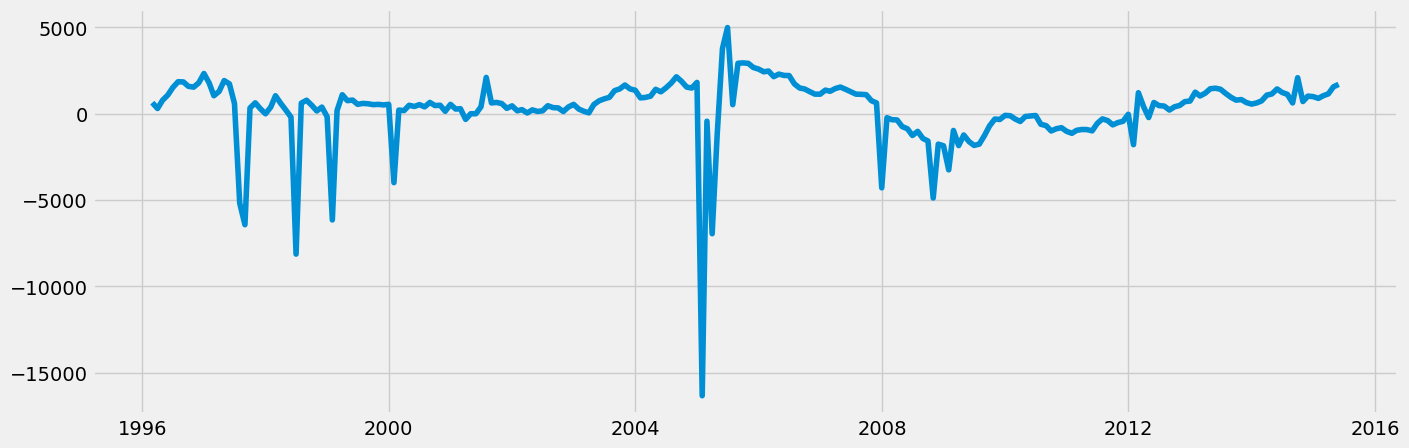

In [24]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)


In [25]:
#Re-run Dickey-Fuller test
dickey_fuller(data_diff)


Dickey-Fuller Stationarity test:
Test Statistic                -6.768102e+00
p-value                        2.684813e-09
Number of Lags Used            1.000000e+00
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64


#### Test Statistics
The test statistic (-6.768102) is relatively large negative value than the critical values.

#### p-value
The p-value is relatively high (2.684813e-09 or 0.000000002684813), which is extremely close to zero. Therefore, the null hypothesis can be rejected.

#### Number of Lags Used
There is 1 lag used to perform the test.

#### Number of Observations Used
There are 230 observations used.

#### Critical Values
If the test statistic is more negative than the critical values, the null hypothesis can be rejected. In this case, the test statistic is more negative than any of the critical values.

#### **Interpretation
The test results suggest that the data is likely stationary because the p-value is extremely small (2.684813e-09 or 0.000000002684813), and the test statistic (-6.768102) is more negative than the critical values at common significance levels (1%, 5%, 10%). Therefore, the test provides strong evidence that the time series data is stationary.

This Dickey-Fuller Stationarity test suggests that the time series data is stationary,.


## Task Step 8 - [Optional] Additional round of differencing

In [26]:
data_diff_1 = data_diff - data_diff.shift(1) 


In [27]:
# Remove missing values that come as a result of differencing
data_diff_1.dropna(inplace = True)


In [28]:
data_diff_1.head()


,value
date,
1996-03-31,-338.000
1996-04-30,479.250
1996-05-31,301.250
1996-06-30,438.625
1996-07-31,331.500


In [29]:
data_diff_1.columns


Index(['value'], dtype='object')

In [50]:
# Saving and exporting haus_sub.csv
data_diff_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'data_diff_1.csv'))


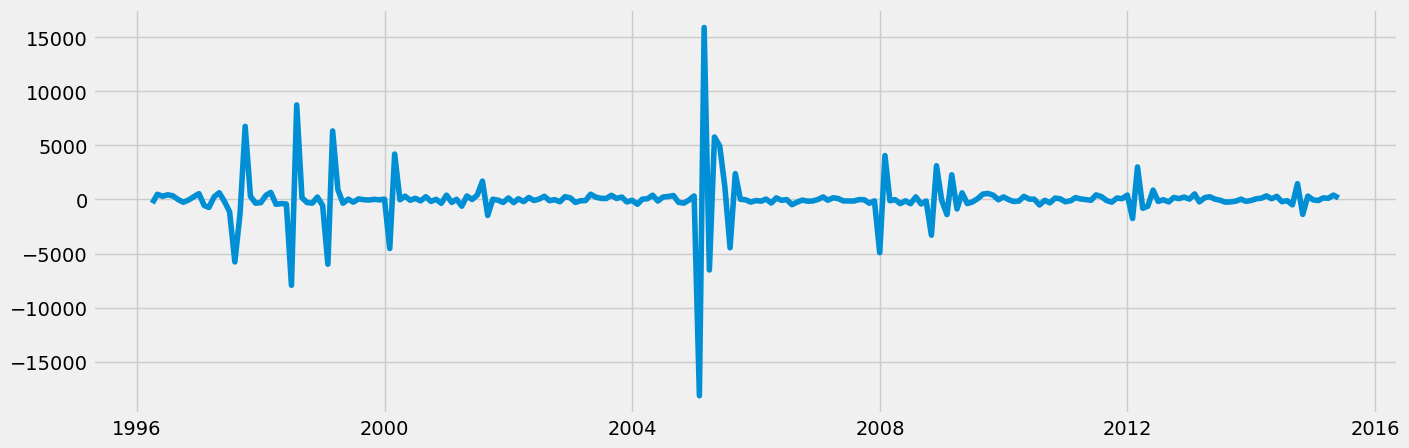

In [30]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)


In [31]:
#Re-run Dickey-Fuller test
dickey_fuller(data_diff_1)


Dickey-Fuller Stationarity test:
Test Statistic                -8.425712e+00
p-value                        1.929458e-13
Number of Lags Used            8.000000e+00
Number of Observations Used    2.220000e+02
Critical Value (1%)           -3.460154e+00
Critical Value (5%)           -2.874649e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


#### Test Statistics
The test statistic (-8.425712) is relatively large negative value than the critical values.

#### p-value
The p-value is relatively high (1.929458e-13 or 0.0000000000001929458), which is extremely close to zero. Therefore, the null hypothesis can be rejected.

#### Number of Lags Used
There is 8 lag used to perform the test.

#### Number of Observations Used
There are 220 observations used.

#### Critical Values
If the test statistic is more negative than the critical values, the null hypothesis can be rejected. In this case, the test statistic is more negative than any of the critical values.

#### **Interpretation
The test results suggest that the data is likely stationary because the p-value is extremely small (1.929458e-13 or 0.0000000000001929458), and the test statistic (-8.425712) is more negative than the critical values at common significance levels (1%, 5%, 10%). Therefore, the test provides strong evidence that the time series data is stationary.

This Dickey-Fuller Stationarity test suggests that the time series data is stationary,.


## Task Step 9 - Autocorrelations

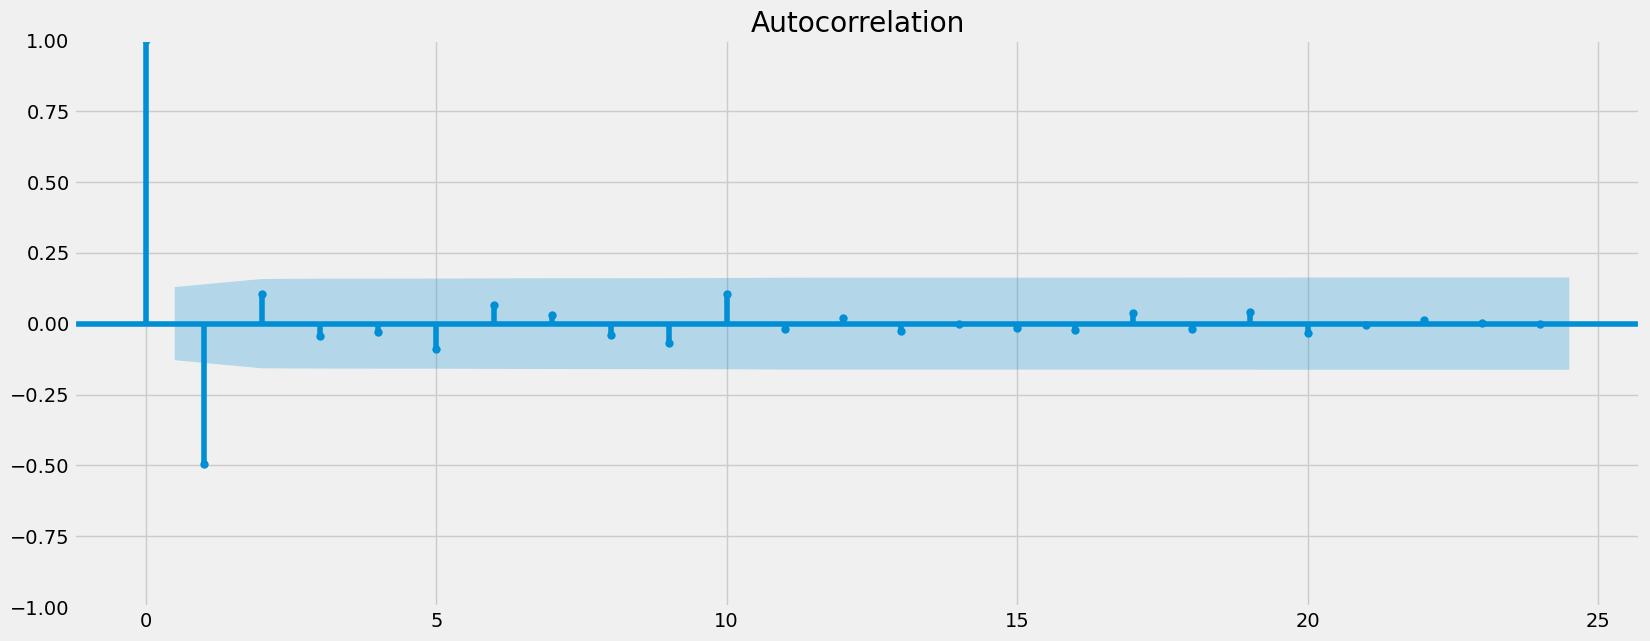

In [32]:
plot_acf(data_diff_1)
plt.show()

In [51]:
# Apply the test using the function on the time series
result_df_1 = dickey_fuller(data_diff_1['value'])

# Calculate autocorrelation values using acf
lags = 40
autocorrelation_values_1 = acf(data_diff_1['value'], nlags=lags, fft=True)

# Save the autocorrelation values to a CSV file
pd.DataFrame({'Autocorrelation': autocorrelation_values_1}).to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'autocorrelation_values_1.csv'), index=False)


Dickey-Fuller Stationarity test:


- The autocorrelation chart shows a decreasing pattern of autocorrelation values as the lag increases. There are some positive correlations at shorter lags, but they become weaker as the lag increases. 

- While the autocorrelation plot has improved (there are fewer autocorrelated terms), it’s still not perfect. This means that, despite the Dickey-Fuller test saying that this data is stationary, that stationarity is weak. But there are still a few lags above the blue confidence interval.
- However, since there are less than 10 of them, I will choose to stop here!

# 6.6 [Bonus] Time Series Forecasting in Python (Incompleted, mentor's advice is needed)


### This script contains the following:

#### 1. Defining Your Parameters
#### 2. Splitting the Data
#### 3. Running and Fitting the Model
#### 4. Iterating

### 1. Defining Your Parameters

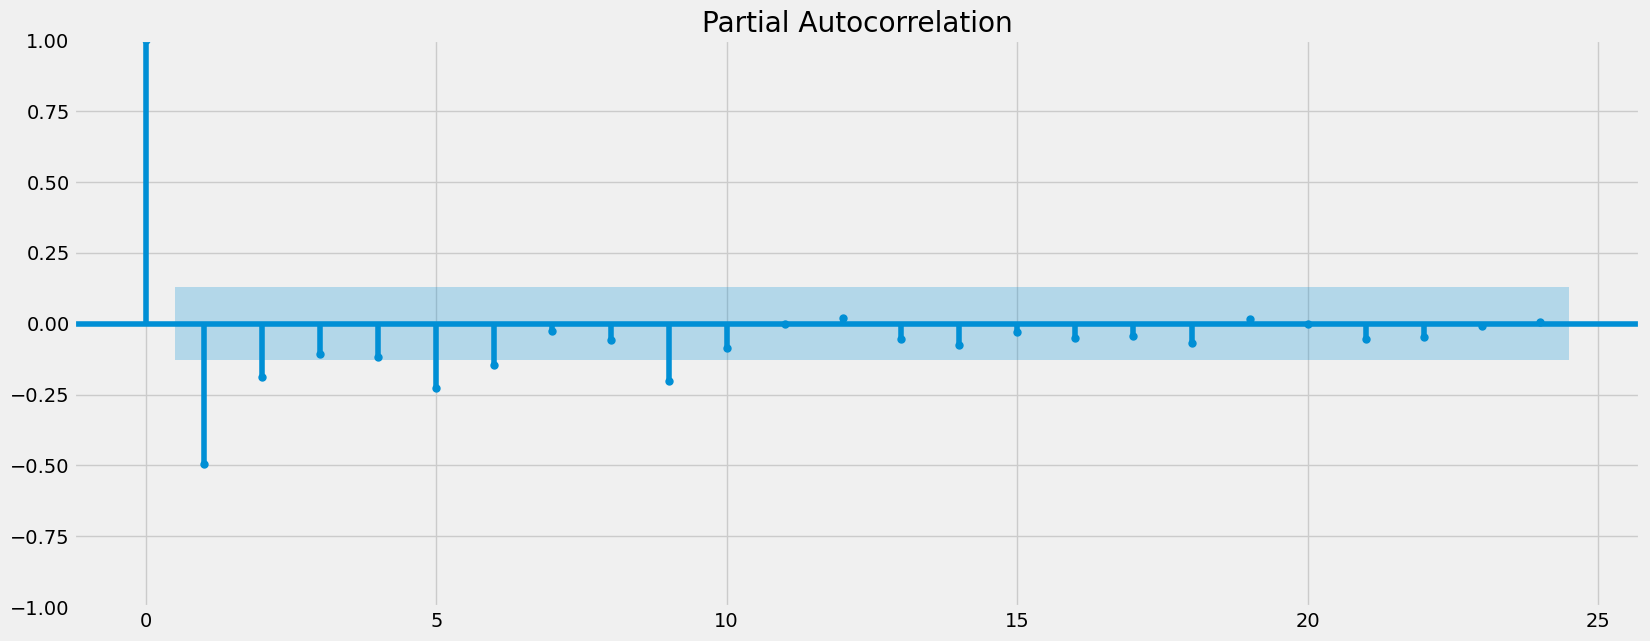

<Figure size 4500x4500 with 0 Axes>

In [33]:
# Plot partial autocorrelations to determine parameter p
plot_pacf(data_diff_1)
plt.figure(figsize=(15,15), dpi=300)
plt.show()


In the figure above, you can see that you have some highly positive bars. These indicate significant correlations. Let’s start by picking 5 AR terms to compensate for the highest of the partial autocorrelations. This makes p = 5.

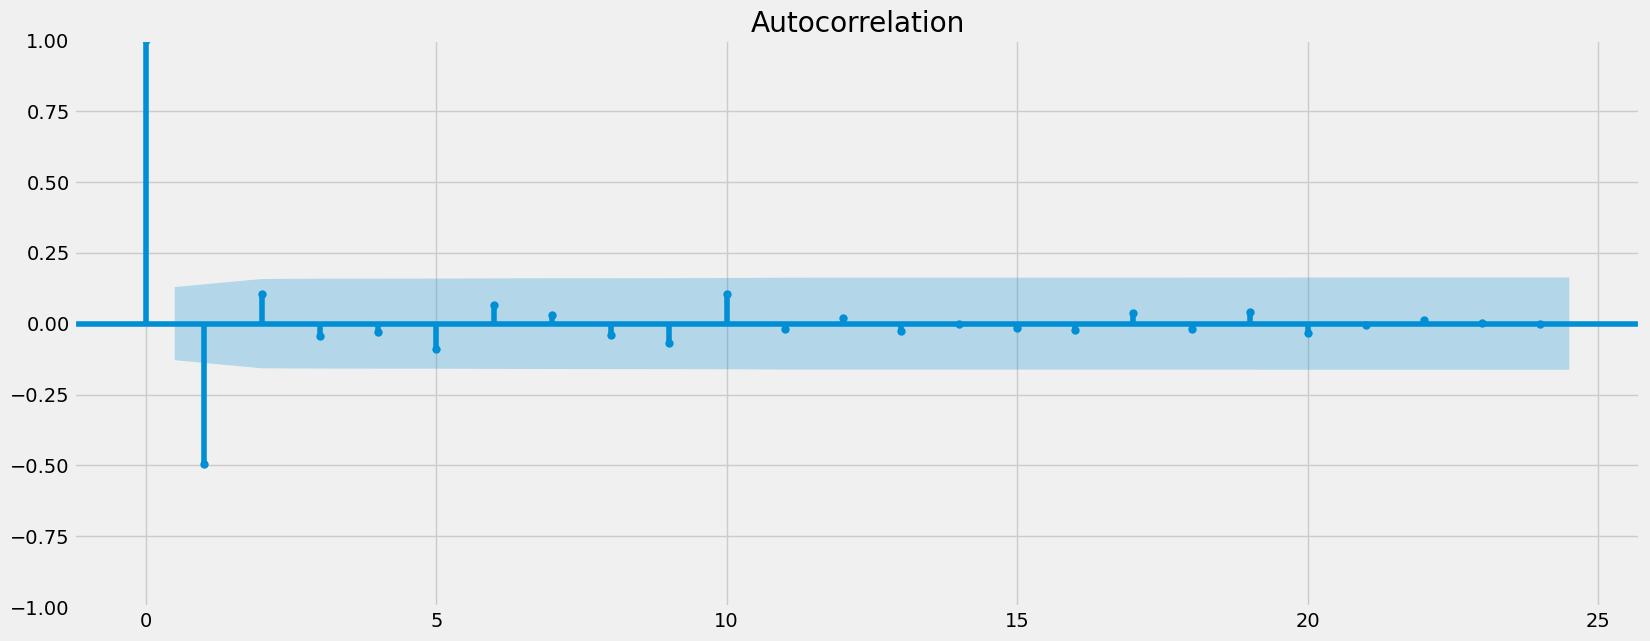

<Figure size 1500x500 with 0 Axes>

In [34]:
# Plot autocorrelations to determine parameter q
plot_acf(data_diff_1)
plt.figure(figsize=(15,5), dpi=100)
plt.show()


You have seven significant autocorrelations here (those that run beyond the blue border), but for now, you can take a more conservative approach and see what the output is like at q = 3. (It’s advisable to start with fewer terms as opposed to more and adjust accordingly further down the line as you begin testing the model.)

### 2. Splitting the Data


In [35]:
# Split the data
train = data_diff_1['value'][:121]
test = data_diff_1['value'][120:]


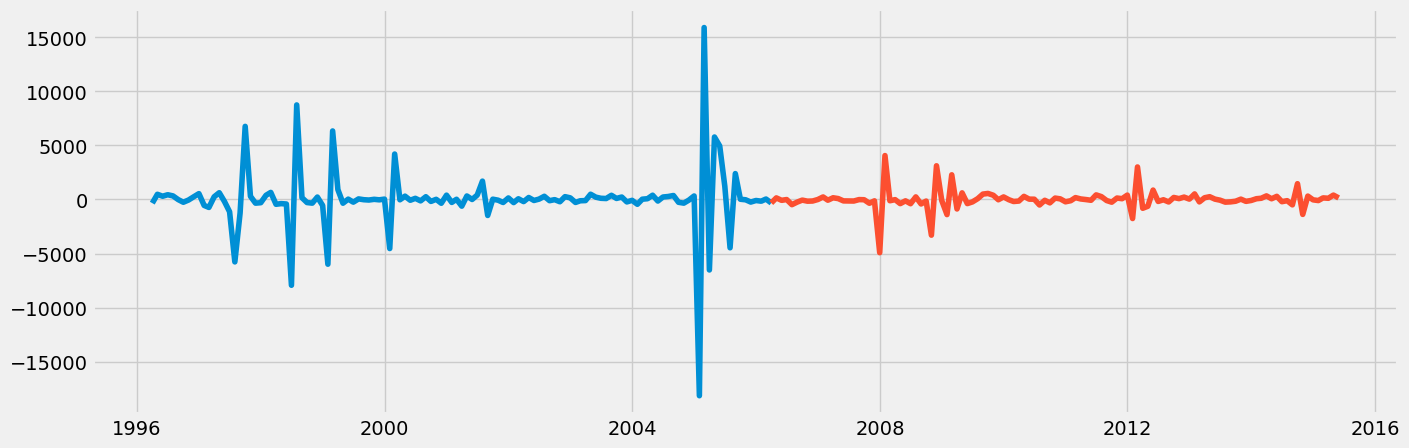

In [36]:
# Plot both sets in order to see the split
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)


In [37]:
test.shape


(111,)

### 3. Running and Fitting the Model

In [38]:
# Import the model you need
from statsmodels.tsa.api import ARIMA 


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  121
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -1108.028
Date:                Sun, 12 Nov 2023   AIC                           2234.056
Time:                        18:26:41   BIC                           2259.143
Sample:                    03-31-1996   HQIC                          2244.244
                         - 03-31-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7973      1.487     -0.536      0.592      -3.712       2.117
ar.L2          0.3962      0.358      1.106      0.269      -0.306       1.098
ar.L3          0.1886      0.375      0.504      0.6

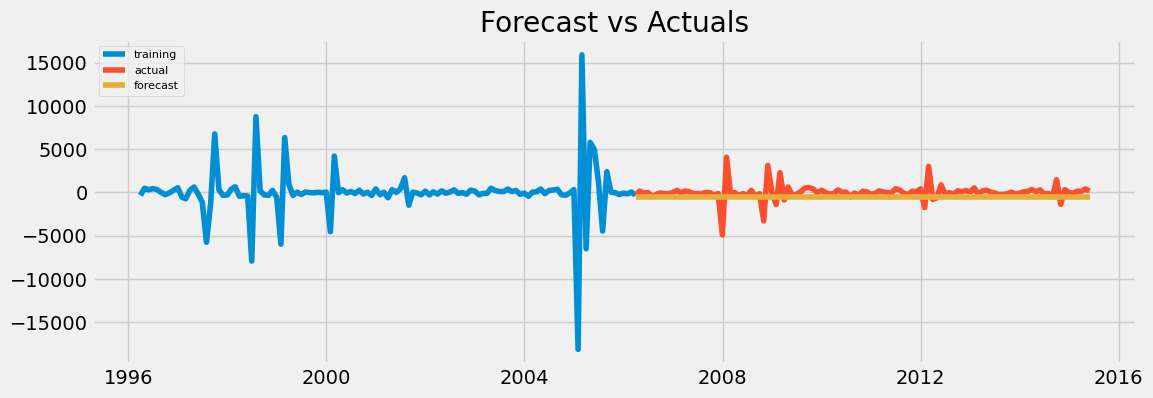

In [39]:
model = ARIMA(train, order=(5, 1, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
#fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
#lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
#upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval


# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve

# Check if `conf` is a scalar (float)
if isinstance(conf, float):
    # If it's a scalar, create constant lower and upper series
    lower_series = pd.Series([conf] * len(test), index=test.index)
    upper_series = pd.Series([conf] * len(test), index=test.index)
else:
    # If it's an array or DataFrame, use it as lower and upper bounds
    lower_series = pd.Series(conf[:, 0], index=test.index)  # Lower bound of the confidence interval
    upper_series = pd.Series(conf[:, 1], index=test.index)  # Upper bound of the confidence interval



# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [40]:
print(type(conf))


<class 'float'>


### 4. Iterating

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  121
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1112.712
Date:                Sun, 12 Nov 2023   AIC                           2235.424
Time:                        18:26:42   BIC                           2249.362
Sample:                    03-31-1996   HQIC                          2241.084
                         - 03-31-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5985      0.053    -11.338      0.000      -0.702      -0.495
ar.L2         -0.2335      0.099     -2.359      0.018      -0.427      -0.039
ar.L3         -0.1028      0.063     -1.623      0.1

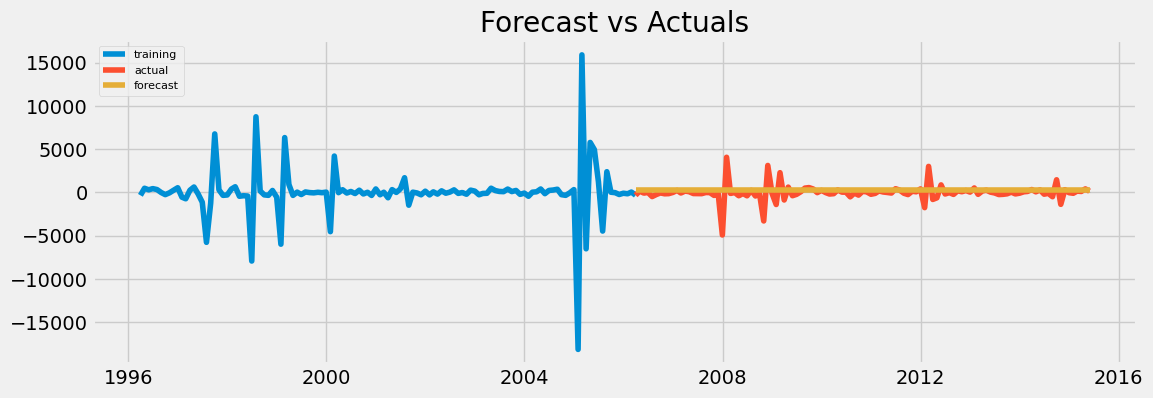

In [41]:
model = ARIMA(train, order=(3, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make into pandas series
#fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)


# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve

# Check if `conf` is a scalar (float)
if isinstance(conf, float):
    # If it's a scalar, create constant lower and upper series
    lower_series = pd.Series([conf] * len(test), index=test.index)
    upper_series = pd.Series([conf] * len(test), index=test.index)
else:
    # If it's an array or DataFrame, use it as lower and upper bounds
    lower_series = pd.Series(conf[:, 0], index=test.index)  # Lower bound of the confidence interval
    upper_series = pd.Series(conf[:, 1], index=test.index)  # Upper bound of the confidence interval


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  121
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1106.340
Date:                Sun, 12 Nov 2023   AIC                           2220.679
Time:                        18:26:42   BIC                           2231.829
Sample:                    03-31-1996   HQIC                          2225.207
                         - 03-31-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2325      0.081      2.866      0.004       0.073       0.391
ma.L1         -1.9942      0.074    -26.881      0.000      -2.140      -1.849
ma.L2          0.9959      0.075     13.209      0.0

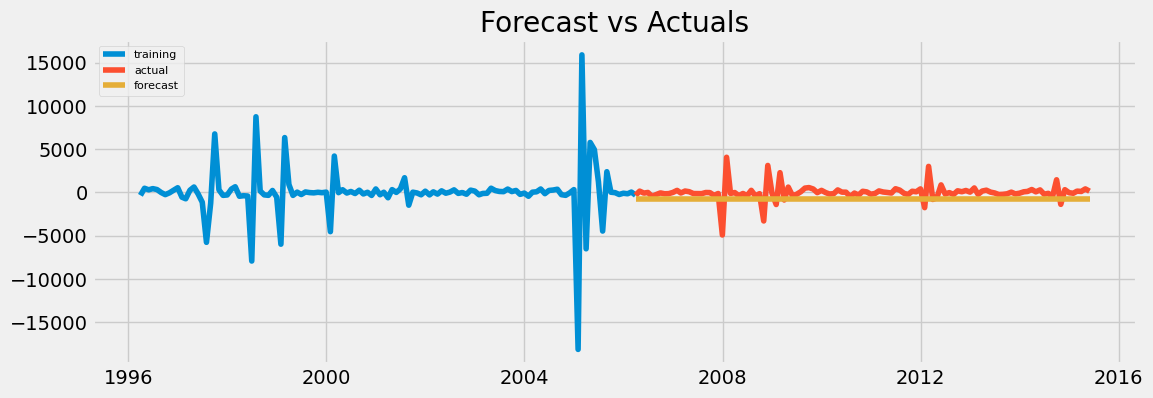

In [42]:
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make into pandas series
#fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)


# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve

# Check if `conf` is a scalar (float)
if isinstance(conf, float):
    # If it's a scalar, create constant lower and upper series
    lower_series = pd.Series([conf] * len(test), index=test.index)
    upper_series = pd.Series([conf] * len(test), index=test.index)
else:
    # If it's an array or DataFrame, use it as lower and upper bounds
    lower_series = pd.Series(conf[:, 0], index=test.index)  # Lower bound of the confidence interval
    upper_series = pd.Series(conf[:, 1], index=test.index)  # Upper bound of the confidence interval


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
